In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

## Datos generales

In [2]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.naive_bayes import GaussianNB

from project.feature_selection.feature_selector import FSPipeline
from project.feature_selection.feature_selector import FSPipelineEvaluator
from project.feature_selection.feature_selector import FeatureSelection

metric = "gmean"
norm = ("minmax", MinMaxScaler()) # probar con standard scaler
estimator = ("naiveBayes", GaussianNB())
cv = RepeatedStratifiedKFold(5, n_repeats=30, random_state=None)
max_n_features = 100
corpus_id = "ma_100"

/home/howl/miniconda3/envs/Tesis/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence
/home/howl/miniconda3/envs/Tesis/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [3]:
from project.utils import read_datasets
datasets = read_datasets("ma")

## Pipelines de métodos de selección

In [ ]:
# Fisher

fisher_pipeline = FSPipeline([
    norm,
    ("fs", FeatureSelection("fisher", max_n_features)),
    estimator,
])

ev_fs = FSPipelineEvaluator([fisher_pipeline,
                             ],
                            cv,
                            metric,
                            max_n_features)

In [5]:
%time res = ev_fs._run(corpus_id, datasets, n_jobs=None, reset=True)

2018-09-12 14:02:45,283 - feature_selection - INFO - Evaluando ma_100
2018-09-12 14:02:45,453 - feature_selection - INFO -  Evaluación de dataset: dataset_prostate_singh iniciada.
2018-09-12 14:02:45,482 - feature_selection - INFO -  Evaluación de dataset: dataset_leukemia_armstrong iniciada.
2018-09-12 14:02:45,499 - feature_selection - INFO -  Evaluación de dataset: dataset_lymphoma_dave_2 iniciada.
2018-09-12 14:02:45,496 - feature_selection - INFO -  Evaluación de dataset: dataset_breast_west iniciada.
2018-09-12 14:02:45,528 - feature_selection - INFO -  Evaluación de dataset: dataset_srbct_khan iniciada.
2018-09-12 14:02:45,607 - feature_selection - INFO -  Evaluación de dataset: dataset_breast_veer iniciada.
2018-09-12 14:02:45,603 - feature_selection - INFO -  Evaluación de dataset: dataset_bladder_sanchez-carbayo iniciada.
2018-09-12 14:02:45,652 - feature_selection - INFO -  Evaluación de dataset: dataset_cns_pomeroy_2 iniciada.
2018-09-12 14:04:53,629 - feature_selection - I

2018-09-12 14:21:03,629 - feature_selection - INFO -  Evaluación de dataset: dataset_prostate_tomlins terminada.
2018-09-12 14:21:05,005 - feature_selection - INFO -  Evaluación de dataset: dataset_bladder_blaveri iniciada.
2018-09-12 14:21:22,097 - feature_selection - INFO -  Evaluación de dataset: dataset_colon_alon terminada.
2018-09-12 14:21:23,247 - feature_selection - INFO -  Evaluación de dataset: dataset_breast_minn iniciada.
2018-09-12 14:21:50,550 - feature_selection - INFO -  Evaluación de dataset: dataset_leukemia_bullinger terminada.
2018-09-12 14:21:50,621 - feature_selection - INFO -  Evaluación de dataset: dataset_leukemia_yagi iniciada.
2018-09-12 14:22:03,593 - feature_selection - INFO -  Evaluación de dataset: dataset_ovarian_li_and_campbell terminada.
2018-09-12 14:22:03,730 - feature_selection - INFO -  Evaluación de dataset: dataset_lymphoma_rosenwald iniciada.
2018-09-12 14:22:45,698 - feature_selection - INFO -  Evaluación de dataset: dataset_glioma_freije termi

CPU times: user 5.33 s, sys: 824 ms, total: 6.16 s
Wall time: 29min 33s


/home/howl/miniconda3/envs/Tesis/lib/python3.7/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)
/home/howl/miniconda3/envs/Tesis/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


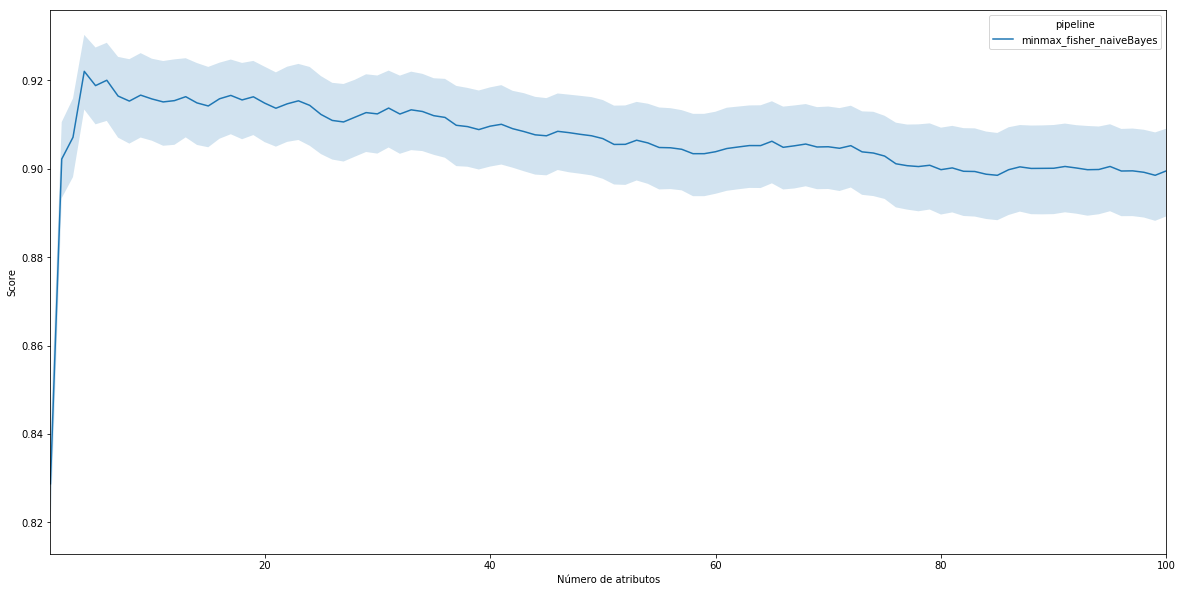

In [11]:
res.results['dataset_prostate_singh'].plot()

.## res.save()

In [ ]:
# ReliefF
reliefF_pipeline = FSPipeline([
    norm,
    ("fs", FeatureSelection("reliefF", max_n_features)),
    estimator,
])

# Chi2
chi2_pipeline = FSPipeline([
    norm,
    ("fs", FeatureSelection("chi_square", max_n_features)),
    estimator,
])

# Random Forest
random_forest_pipeline = FSPipeline([
    norm,
    ("fs", FeatureSelection("random_forest", max_n_features)),
    estimator,
])

In [3]:
from project.utils import read_datasets

In [5]:
datasets = read_datasets("ma")